Load the data

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')

train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Data cleaning

In [ ]:
# Check how many missing values each column has
train_df.isnull().sum()
# Fill missing keywords and locations with "unknown"
# train_df['keyword'].fillna("unknown", inplace=True)
# train_df['location'].fillna("unknown", inplace=True)
train_df['keyword'] = train_df['keyword'].fillna("unknown")
train_df['location'] = train_df['location'].fillna("unknown")


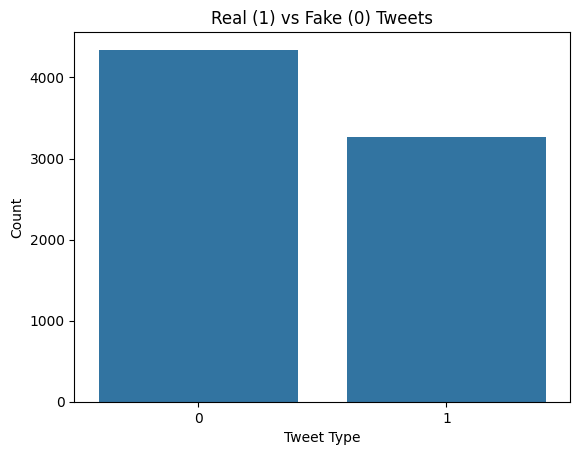

In [ ]:
# Plot how many tweets are real (1) vs fake (0)
sns.countplot(x='target', data=train_df)
plt.title("Real (1) vs Fake (0) Tweets")
plt.xlabel("Tweet Type")
plt.ylabel("Count")
plt.show()

keyword
unknown                  61
fatalities               45
deluge                   42
armageddon               42
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 222, dtype: int64


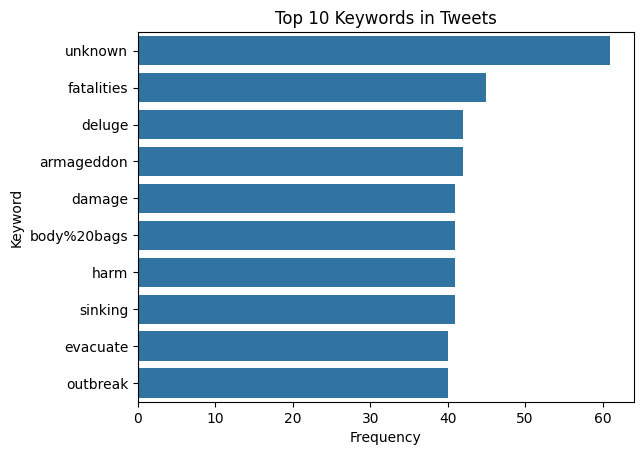

In [ ]:
# Top 10 most common keywords
top_keywords = train_df['keyword'].value_counts().head(10)

print(train_df['keyword'].value_counts())

sns.barplot(x=top_keywords.values, y=top_keywords.index)
plt.title("Top 10 Keywords in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

Preprocessing


In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords if not done already
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # 1. Remove URLs, mentions, special characters, digits
    text = re.sub(r"http\S+|www\S+|@\w+|[^a-zA-Z\s]", "", text)

    # 2. Lowercase
    text = text.lower()

    # 3. Tokenize (split text into words)
    words = text.split()

    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 5. Stemming
    words = [stemmer.stem(word) for word in words]

    # 6. Join words back into a string
    return " ".join(words)


In [ ]:
train_df['clean_text'] = train_df['text'].apply(preprocess_text)


wordcloud visualise


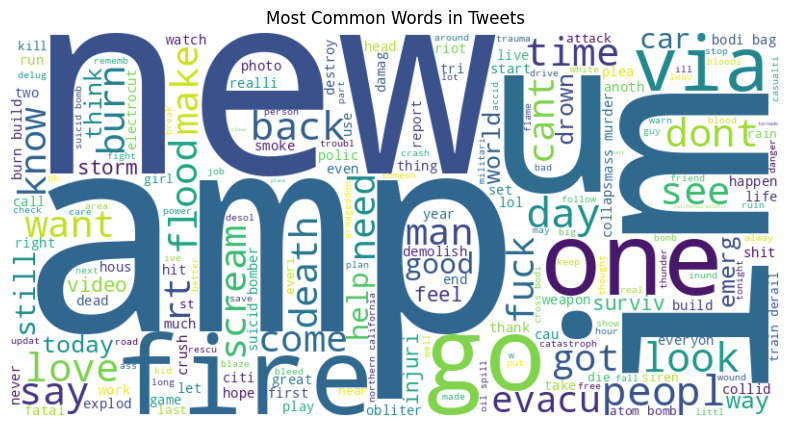

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = " ".join(train_df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer
cv = CountVectorizer()

# Transform text into word-count vectors
X_cv = cv.fit_transform(train_df['clean_text'])

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer()

# Transform the data
X_tfidf = tfidf.fit_transform(train_df['clean_text'])


In [ ]:
# Final choice
X = X_tfidf   # or X = X_cv
y = train_df['target']


In [ ]:
print(test_df.columns)


Index(['id', 'keyword', 'location', 'text'], dtype='object')


model= logistic regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the model
model = LogisticRegression()

# 3. Train (fit) the model
model.fit(X_train, y_train)

# 4. Predict on the validation set
y_pred = model.predict(X_val)

# 5. Evaluate the model
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))


[[781  93]
 [221 428]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       874
           1       0.82      0.66      0.73       649

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523

F1 Score: 0.7316239316239316


SVM model

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# 1. Initialize the model
svm_model = LinearSVC()

# 2. Train the model on training data
svm_model.fit(X_train, y_train)

# 3. Predict on validation set
y_pred_svm = svm_model.predict(X_val)

# 4. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))
print("F1 Score:", f1_score(y_val, y_pred_svm))


Confusion Matrix:
 [[739 135]
 [201 448]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.81       874
           1       0.77      0.69      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

F1 Score: 0.7272727272727273


naive bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# 1. Initialize the model
nb_model = MultinomialNB()

# 2. Train the model
nb_model.fit(X_train, y_train)

# 3. Predict on validation set
y_pred_nb = nb_model.predict(X_val)

# 4. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_nb))
print("F1 Score:", f1_score(y_val, y_pred_nb))


Confusion Matrix:
 [[785  89]
 [209 440]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.68      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

F1 Score: 0.7470288624787776


hyperparameter tuning for grid search cv



for logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 1. Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l2'],              # Use l2 norm (standard)
    'solver': ['liblinear']         # Suitable for small datasets
}

# 2. Initialize base model
lr = LogisticRegression()

# 3. GridSearch with 5-fold cross-validation
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1', verbose=1)
grid.fit(X_train, y_train)

# 4. Best model
best_lr = grid.best_estimator_

# 5. Predict and evaluate
y_pred_best = best_lr.predict(X_val)

from sklearn.metrics import classification_report, f1_score
print("Tuned Logistic Regression F1 Score:", f1_score(y_val, y_pred_best))
print(classification_report(y_val, y_pred_best))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Tuned Logistic Regression F1 Score: 0.724025974025974
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       874
           1       0.77      0.69      0.72       649

    accuracy                           0.78      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.78      0.78      0.77      1523



for svm

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

svc = LinearSVC()
grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1', verbose=1)
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
y_pred_svm = best_svm.predict(X_val)

print("Tuned SVM F1 Score:", f1_score(y_val, y_pred_svm))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Tuned SVM F1 Score: 0.7272727272727273


randomized searrch cv for naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score
import numpy as np

# 1. Define parameter distribution
param_dist = {
    'alpha': np.linspace(0, 1.0, 100)  # 100 values between 0 and 1
}

# 2. Create model
nb_model = MultinomialNB()

# 3. Run randomized search
random_search = RandomizedSearchCV(
    nb_model,
    param_distributions=param_dist,
    n_iter=20,                  # Try 20 random values
    scoring='f1',               # Optimize for F1 score
    cv=5,                       # 5-fold cross-validation
    random_state=42,
    verbose=1
)

# 4. Fit on training data
random_search.fit(X_train, y_train)

# 5. Best model
best_nb = random_search.best_estimator_

# 6. Predict and evaluate
y_pred_nb = best_nb.predict(X_val)
print("Best alpha:", random_search.best_params_['alpha'])
print("Tuned Naive Bayes F1 Score:", f1_score(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Best alpha: 0.30303030303030304
Tuned Naive Bayes F1 Score: 0.7493877551020408
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



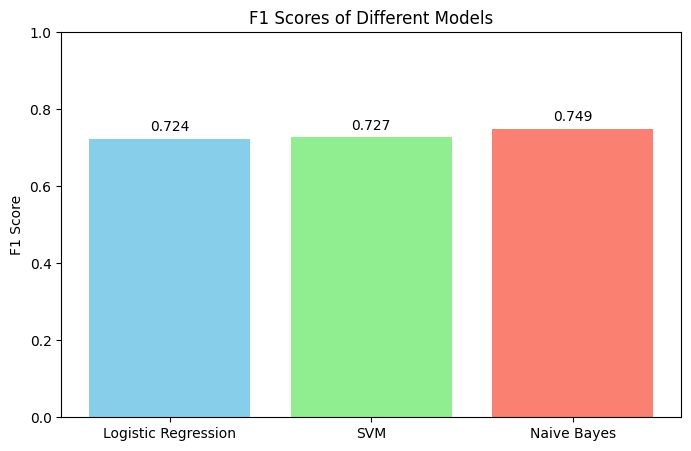

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# 1. Make predictions
y_pred_lr = best_lr.predict(X_val)
y_pred_svm = best_svm.predict(X_val)
y_pred_nb = best_nb.predict(X_val)

# 2. Calculate F1 scores
f1_lr = f1_score(y_val, y_pred_lr)
f1_svm = f1_score(y_val, y_pred_svm)
f1_nb = f1_score(y_val, y_pred_nb)

# 3. Store results
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes']
f1_scores = [f1_lr, f1_svm, f1_nb]

# 4. Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, f1_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("F1 Scores of Different Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)

# 5. Annotate scores on bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{score:.3f}", ha='center', fontsize=10)

plt.show()


visualize

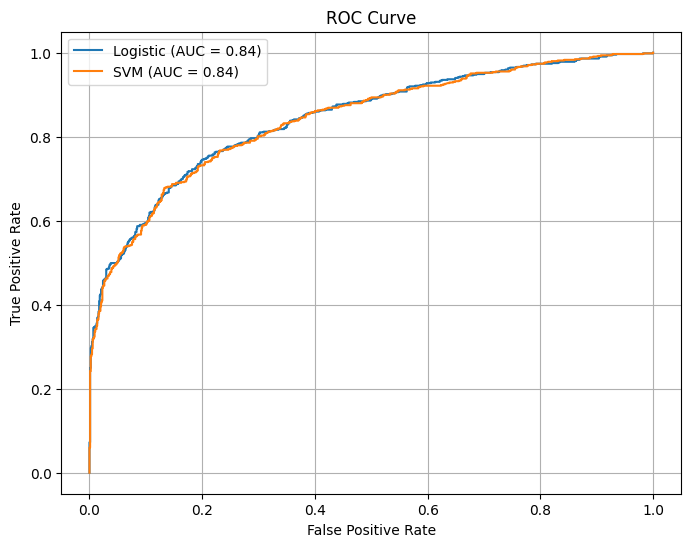

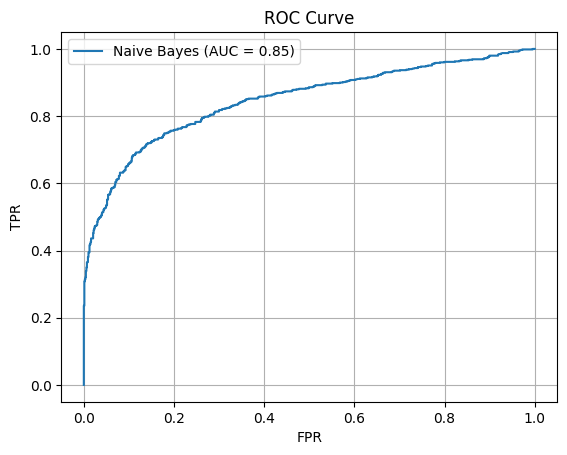

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

def plot_curves(model, X_val, y_val, label):
    y_scores = model.decision_function(X_val)  # for SVM and Logistic

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    auc = roc_auc_score(y_val, y_scores)

    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

# Plot for Logistic & SVM
plt.figure(figsize=(8, 6))
plot_curves(best_lr, X_val, y_val, "Logistic")
plot_curves(best_svm, X_val, y_val, "SVM")
plt.legend()
plt.grid(True)
plt.show()

y_probs_nb = best_nb.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_probs_nb)
auc = roc_auc_score(y_val, y_probs_nb)

plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {auc:.2f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


🔍 Showing first 5 misclassified tweets:

Tweet:
So you have a new weapon that can cause un-imaginable destruction.
→ True Label: 1, Predicted: 0

Tweet:
@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time
→ True Label: 0, Predicted: 1

Tweet:
my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS
→ True Label: 1, Predicted: 0

Tweet:
@brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS
→ True Label: 1, Predicted: 0

Tweet:
Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her
 
#FARRAKHAN #QUOTE
→ True Label: 0, Predicted: 1



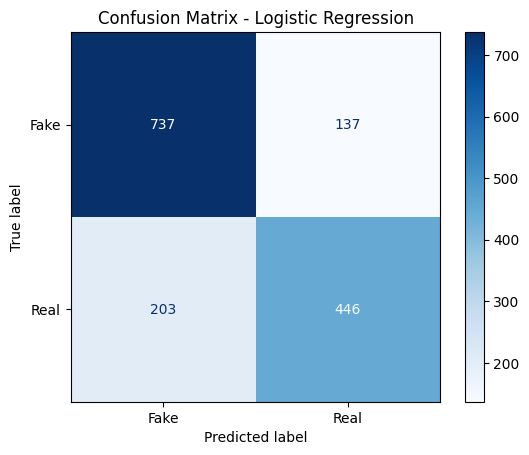

In [ ]:
# Predict using the model
y_pred = best_lr.predict(X_val)

# Get misclassified indexes
misclassified_idx = (y_val != y_pred)

# Convert to list of indices
misclassified_indices = y_val[misclassified_idx].index

# Print original tweets from train_df based on those indices
print("🔍 Showing first 5 misclassified tweets:\n")
for i in misclassified_indices[:5]:
    print(f"Tweet:\n{train_df.loc[i, 'text']}")
    print(f"→ True Label: {y_val.loc[i]}, Predicted: {y_pred[list(y_val.index).index(i)]}\n")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
import joblib
joblib.dump(best_lr, "model.pkl")
joblib.dump(tfidf, "vectorizer.pkl")


['vectorizer.pkl']